### Interpretation of the results of solving the optimization task
The research: https://www.sciencedirect.com/science/article/pii/S0140988319302798

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib
from matplotlib import cm

#### 1. Total costs

Total cost data

In [2]:
costs = pd.read_csv("TotalCostVector.csv", header=None)
costs.columns = ["Total costs"]
costs.index = costs.index + 1
costs["Total costs (bln)"] = costs["Total costs"] / pow(10, 9)
costs.head()

,Total costs,Total costs (bln)
1,7.569765e+11,756.976525
2,7.566213e+11,756.621321
3,7.546836e+11,754.683619
4,7.544074e+11,754.407405
5,7.540830e+11,754.083042


Comparison of total costs for different scenarios

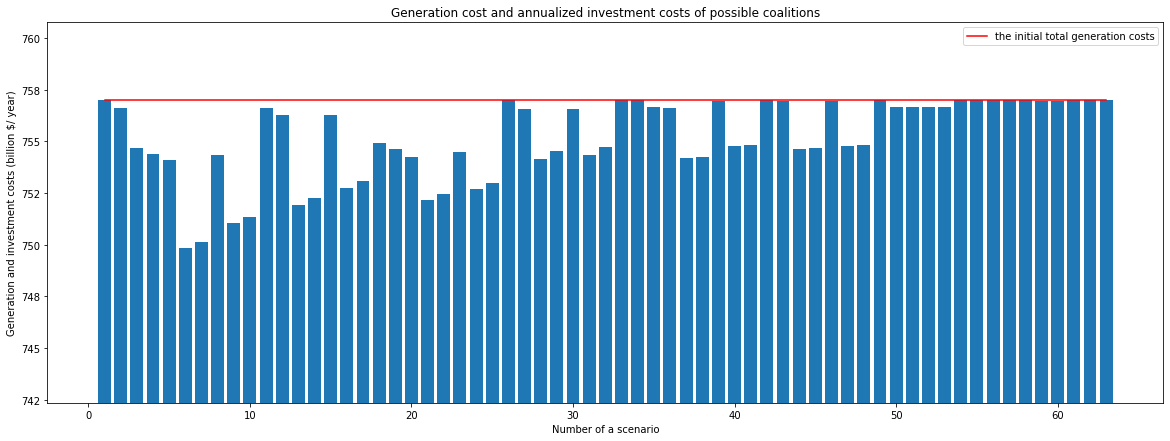

In [3]:
plt.figure(figsize=(20,7))
ax = plt.axes()

y = costs['Total costs (bln)']
x = costs.index

plt.bar(x, y)
ax.set_ylim([0.99 * y.min(), 1.005 * y.max()]);
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{:.0f}'.format(x)))
plt.title("Generation cost and annualized investment costs of possible coalitions")
plt.xlabel("Number of a scenario")
plt.ylabel("Generation and investment costs (billion $/ year)")

x_coordinates = [1, 63]
y_coordinates = [y.max(), y.max()]

plt.plot(x_coordinates, y_coordinates, color='r', label='the initial total generation costs')
plt.legend()
plt.show()

Source: original research (p. 11/16)

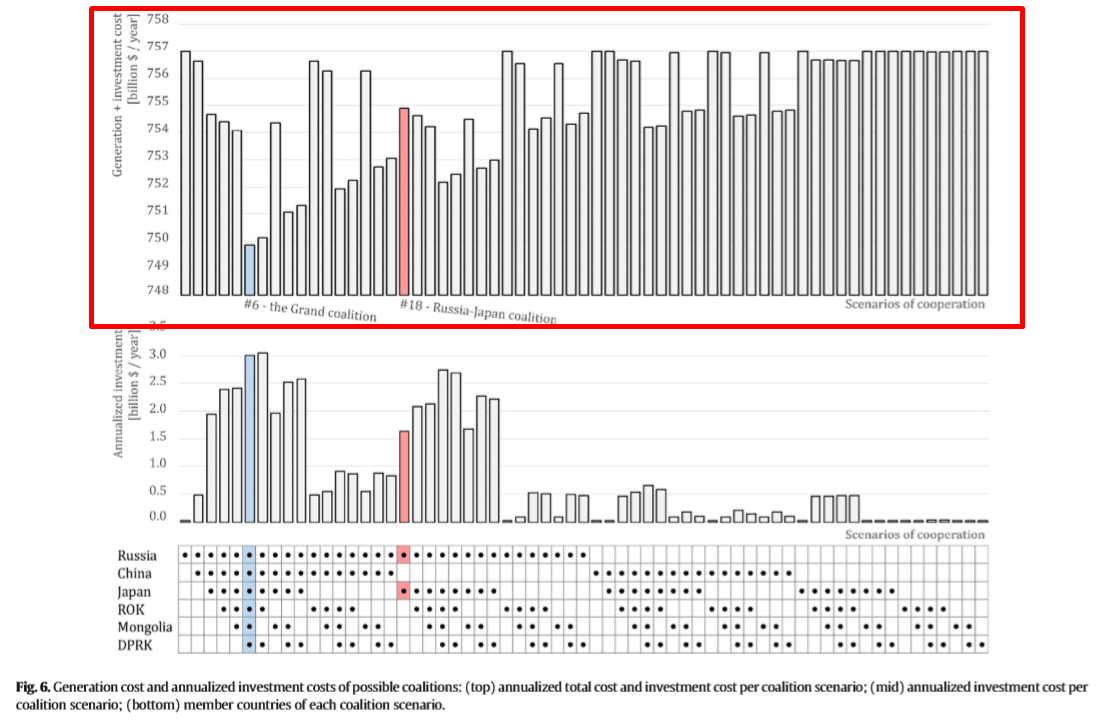

#### 2. Investment metrics:
a. NPV<BR>
b. ROI

Let's consider income of possible coalitions

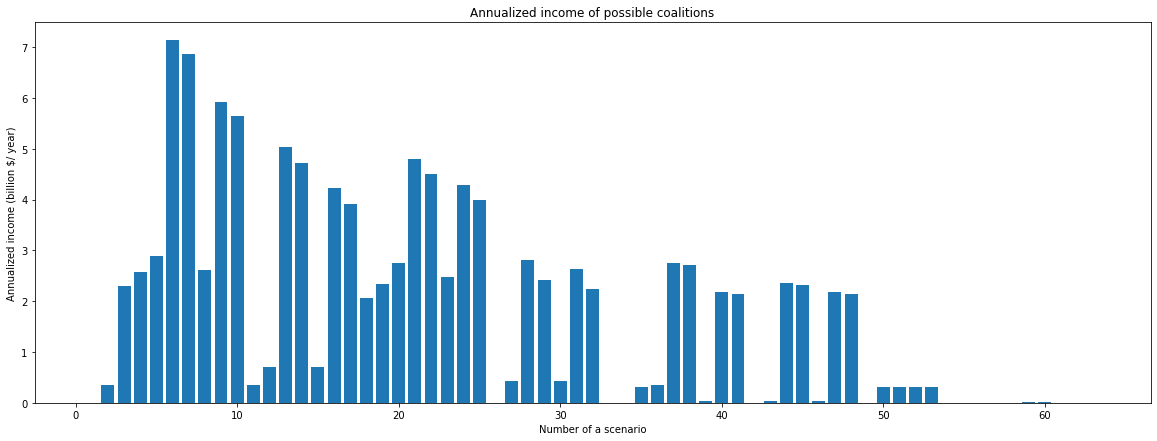

In [4]:
costs['income'] = y.max() - y
plt.figure(figsize=(20,7))
ax = plt.axes()

y = costs['income']
x = costs.index

plt.bar(x, y)
plt.title("Annualized income of possible coalitions")
plt.xlabel("Number of a scenario")
plt.ylabel("Annualized income (billion $/ year)")
plt.show()

Let's consider annualized investment costs of possible coalitions

In [5]:
inv = pd.read_csv("πlVector.csv", header=None)
inv.columns = ["Total costs"]
inv.index = inv.index + 1
inv["Total costs (bln)"] = inv["Total costs"] / pow(10, 9)
inv.head()

,Total costs,Total costs (bln)
1,2.679750e+07,0.026798
2,4.836700e+08,0.483670
3,1.939261e+09,1.939261
4,2.379261e+09,2.379261
5,2.400696e+09,2.400696


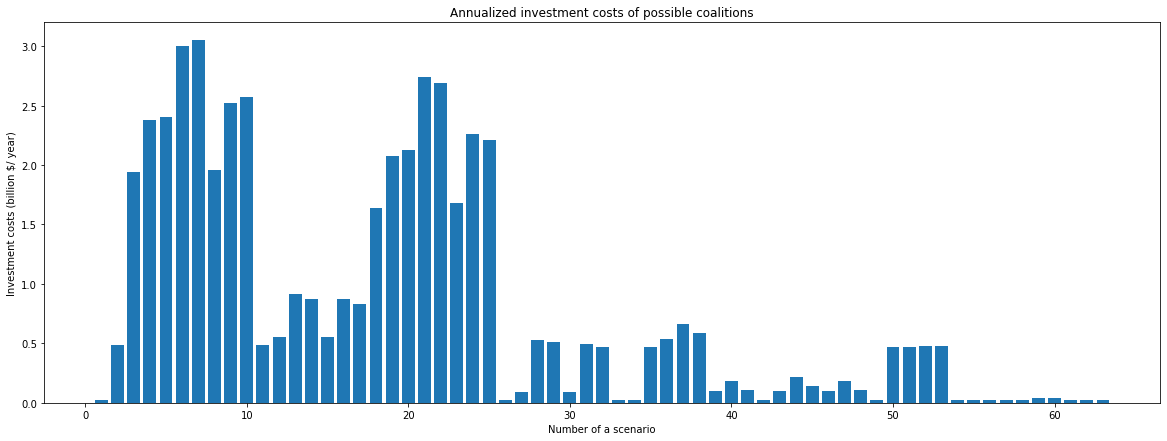

In [6]:
plt.figure(figsize=(20,7))
ax = plt.axes()

y = inv['Total costs (bln)']
x = inv.index

plt.bar(x, y)
plt.title("Annualized investment costs of possible coalitions")
plt.xlabel("Number of a scenario")
plt.ylabel("Investment costs (billion $/ year)")
plt.show()

##### b. ROI

In [7]:
inv['ROI'] = (costs['income']) / (inv['Total costs (bln)'] + 1)
inv.head()

,Total costs,Total costs (bln),ROI
1,2.679750e+07,0.026798,0.000000
2,4.836700e+08,0.483670,0.239409
3,1.939261e+09,1.939261,0.780096
4,2.379261e+09,2.379261,0.760261
5,2.400696e+09,2.400696,0.850850


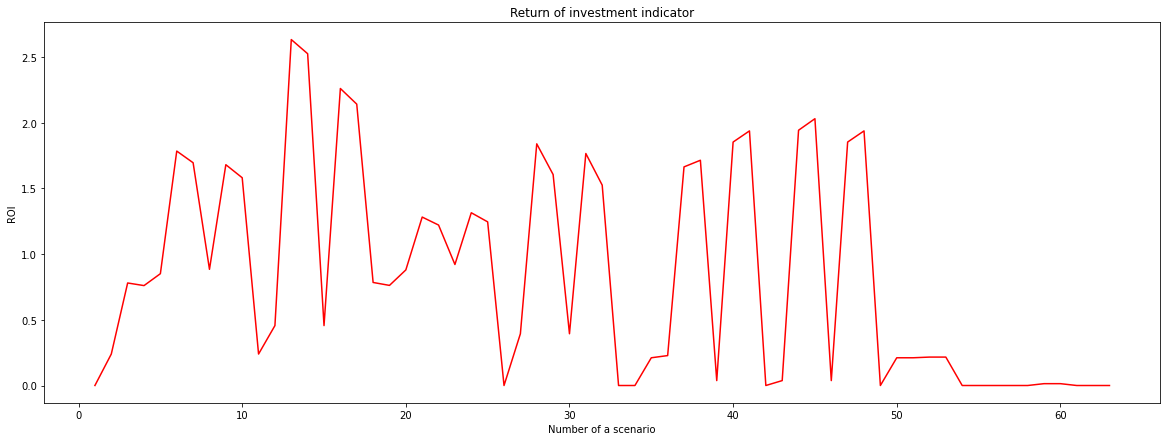

In [8]:
plt.figure(figsize=(20,7))
ax = plt.axes()

y = inv['ROI']
x = inv.index

plt.plot(x, y, color='r')
plt.title("Return of investment indicator")
plt.xlabel("Number of a scenario")
plt.ylabel("ROI")
plt.show()

Let's compare annualized income and the indicator

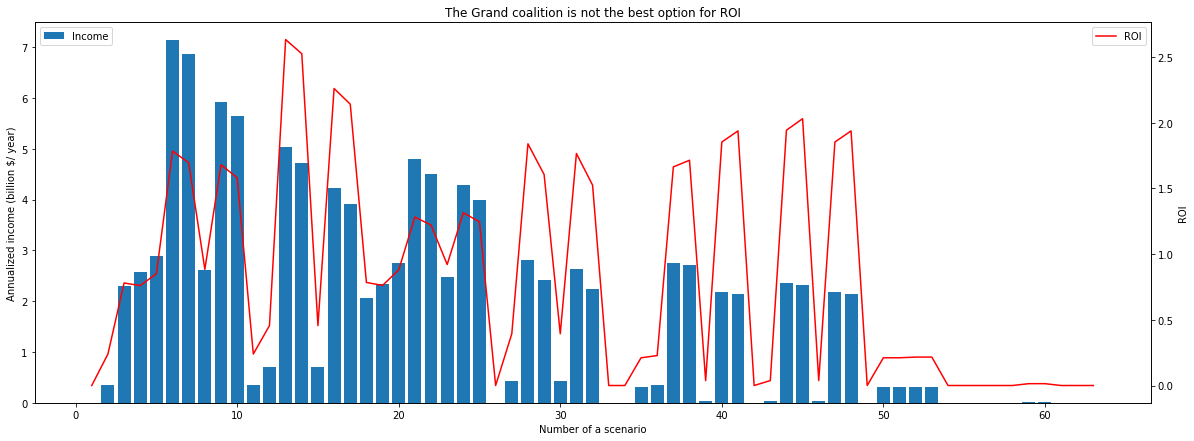

In [9]:
fig, ax1 = plt.subplots(figsize=(20, 7))
y = costs['income']
x = costs.index
ax1.bar(x, y)
ax1.set_ylabel("Annualized income (billion $/ year)")
ax1.legend(["Income"],loc=2)
ax1.set_xlabel("Number of a scenario")

ax2 = ax1.twinx()
y = inv['ROI']
x = inv.index
ax2.plot(x, y, color='r')
ax2.set_ylabel("ROI")
ax2.set_xlabel("Number of a scenario")
ax2.set_title("The Grand coalition is not the best option for ROI")
ax2.legend(["ROI"], loc=1)
plt.show();

Comparison possible scenarios

>The Grand coalition = all countries
1. Annualized income (billion $/ year) = 7.1
2. ROI = 1.4

>Example: 16 scenario = Russain, DPRK, China, Mongolia<br>
1. Annualized income (billion $/ year) = 4.4
2. ROI = 3.8